In [ ]:
pip install numpy pandas scikit-learn tensorflow

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# List of CSV file paths
file_paths = [
    "/content/malware - Copy.csv",
    "/content/malware.csv",
    "/content/mal5.csv",
    "/content/mal4.csv",
    "/content/mal3.csv",
    "/content/mal2.csv",
    "/content/bravebrowser_log.csv",
    "/content/applock_log.csv",
    "/content/920Text.csv",
    "/content/Acode.csv",
    "/content/Dcoder.csv",
    "/content/apk113.csv",
    "/content/Quoda Code editor.csv",
    "/content/anwriter Html Editor.csv",
    "/content/Turbo.csv",
    "/content/Writer tools.csv",
    "/content/Writerplus.csv",
    "/content/bchat_log.csv",
    "/content/finddaily_log.csv",
    "/content/malnmttools_log.csv",
    "/content/malpegasusmobil_log.csv",
    "/content/malspydialer_log.csv",
    "/content/maladadda_log.csv",
    "/content/malanu_bifuulro_log.csv",
    "/content/malanu_bifuulro_log.csv",
    "/content/malbusybox_log.csv",
    "/content/mallololo_log.csv",
    "/content/malvenusflytrap_log.csv",
    "/content/maltiktokvpn_log.csv",
    "/content/maltaobao_log.csv",
    "/content/malturtl_log.csv",
    "/content/malxplore_log.csv",
    "/content/mal_adFraud.csv",
    "/content/mal_Among_Us.csv",
    "/content/mal_AUDIFY.csv",
    "/content/mal_Avast.csv",
    "/content/mal_barcode.csv",
    "/content/mal_Corona_test.csv",
    "/content/mal_diabetesblood_log.csv",
    "/content/mal_Fattura.csv",
    "/content/mal_Islam_Voice.csv",
    "/content/mal_Visa_master.csv",
    "/content/mal_itranslator.csv",
    "/content/mal_tracerShield.csv",
    "/content/mal_V-alert_covid19.csv",
    "/content/mal_google_play.csv",
    "/content/sharechat_log.csv",
    "/content/storymatrix_drama_log.csv",
    "/content/totta_log.csv",
    "/content/tUBEMATE.csv",
    "/content/weplay_ar_log.csv",
    "/content/weplay_log.csv",
    "/content/deep.csv",
    "/content/malsupervpn_log.csv",
    "/content/malthundervpn_log.csv",
    "/content/malufovpn_log.csv",
    "/content/malgovpn_log.csv",
    "/content/malintouchvpn_log.csv",
    "/content/malvpnmaster_log.csv"


]

# Combine data from all files
dataframes = []
for file in file_paths:
    label = "malicious" if "mal" in file.lower() else "genuine"
    df = pd.read_csv(file)
    df["label"] = label
    dataframes.append(df)

# Combine all dataframes into one
data = pd.concat(dataframes, ignore_index=True)


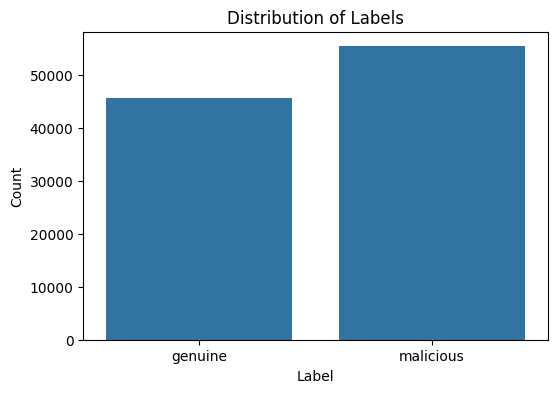

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=data)
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()






In [ ]:
# Drop rows where all critical fields are missing
critical_columns = ["Timestamp", "PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
data = data.dropna(subset=critical_columns, how="all").copy()

# Fill missing values with placeholders
data["App"] = data["App"].fillna("unknown_app")
data["ProcessName"] = data["ProcessName"].fillna("unknown_process")

# Encode 'SContext', 'TContext', 'App', and 'ProcessName'
encoder_columns = ["SContext", "TContext", "App", "ProcessName"]
encoders = {}
for col in encoder_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder

# Convert 'Timestamp' to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%m-%d %H:%M:%S.%f", errors="coerce")
data = data.dropna(subset=["Timestamp"])  # Drop rows with invalid timestamps

# Map labels to binary values
data["label"] = data["label"].map({"genuine": 0, "malicious": 1})


In [ ]:
# Sort by Timestamp
data.sort_values(by="Timestamp", inplace=True)

# Define features and labels
feature_columns = ["PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
target_column = "label"

# Create sequences
sequence_length = 10
features, labels = [], []
for i in range(len(data) - sequence_length):
    features.append(data[feature_columns].iloc[i:i+sequence_length].values)
    labels.append(data[target_column].iloc[i+sequence_length-1])

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Example setup (Replace with your actual data loading code)
file_paths = [
                  "/content/malware - Copy.csv",
    "/content/malware.csv",
    "/content/mal5.csv",
    "/content/mal4.csv",
    "/content/mal3.csv",
    "/content/mal2.csv",
    "/content/bravebrowser_log.csv",
    "/content/applock_log.csv",
    "/content/920Text.csv",
    "/content/Acode.csv",
    "/content/Dcoder.csv",
    "/content/apk113.csv",
    "/content/Quoda Code editor.csv",
    "/content/anwriter Html Editor.csv",
    "/content/Turbo.csv",
    "/content/Writer tools.csv",
    "/content/Writerplus.csv",
    "/content/bchat_log.csv",
    "/content/finddaily_log.csv",
    "/content/malnmttools_log.csv",
    "/content/malpegasusmobil_log.csv",
    "/content/malspydialer_log.csv",
    "/content/maladadda_log.csv",
    "/content/malanu_bifuulro_log.csv",
    "/content/malanu_bifuulro_log.csv",
    "/content/malbusybox_log.csv",
    "/content/mallololo_log.csv",
    "/content/malvenusflytrap_log.csv",
    "/content/maltiktokvpn_log.csv",
    "/content/maltaobao_log.csv",
    "/content/malturtl_log.csv",
    "/content/malxplore_log.csv",
    "/content/mal_adFraud.csv",
    "/content/mal_Among_Us.csv",
    "/content/mal_AUDIFY.csv",
    "/content/mal_Avast.csv",
    "/content/mal_barcode.csv",
    "/content/mal_Corona_test.csv",
    "/content/mal_diabetesblood_log.csv",
    "/content/mal_Fattura.csv",
    "/content/mal_Islam_Voice.csv",
    "/content/mal_Visa_master.csv",
    "/content/mal_itranslator.csv",
    "/content/mal_tracerShield.csv",
    "/content/mal_V-alert_covid19.csv",
    "/content/mal_google_play.csv",
    "/content/sharechat_log.csv",
    "/content/storymatrix_drama_log.csv",
    "/content/totta_log.csv",
    "/content/tUBEMATE.csv",
    "/content/weplay_ar_log.csv",
    "/content/weplay_log.csv",
    "/content/deep.csv",
    "/content/malsupervpn_log.csv",
    "/content/malthundervpn_log.csv",
    "/content/malufovpn_log.csv",
    "/content/malgovpn_log.csv",
    "/content/malintouchvpn_log.csv",
    "/content/malvpnmaster_log.csv"






]

# Combine data from all files
dataframes = []
for file in file_paths:
    label = "malicious" if "mal" in file.lower() else "genuine"
    df = pd.read_csv(file)
    df["label"] = label
    dataframes.append(df)

# Combine all dataframes into one
data = pd.concat(dataframes, ignore_index=True)

# Data preprocessing
critical_columns = ["Timestamp", "PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
data = data.dropna(subset=critical_columns, how="all").copy()
data["App"] = data["App"].fillna("unknown_app")
data["ProcessName"] = data["ProcessName"].fillna("unknown_process")
data["label"] = data["label"].map({"genuine": 0, "malicious": 1})

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
encoder_columns = ["SContext", "TContext", "App", "ProcessName"]
encoders = {}
for col in encoder_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder

# Converting timestamp to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%m-%d %H:%M:%S.%f", errors="coerce")
data = data.dropna(subset=["Timestamp"])
data.sort_values(by="Timestamp", inplace=True)

# Define feature columns and target
feature_columns = ["PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
target_column = "label"

# Sequence creation
sequence_length = 10  # Adjust if needed
features, labels = [], []
for i in range(len(data) - sequence_length):
    features.append(data[feature_columns].iloc[i:i+sequence_length].values)
    labels.append(data[target_column].iloc[i+sequence_length-1])

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Debugging: Check the number of sequences created
print(f"Total rows in data: {len(data)}")
print(f"Sequence length: {sequence_length}")
print(f"Number of sequences created: {len(features)}")

# Check if features and labels are non-empty
if len(features) == 0 or len(labels) == 0:
    print("Error: No sequences created. Check sequence_length or data size.")
else:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


Total rows in data: 51226
Sequence length: 10
Number of sequences created: 51216
Train samples: 40972, Test samples: 10244


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
!pip install category_encoders
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce

# Example setup (Replace with your actual data loading code)
file_paths = [
                  "/content/malware - Copy.csv",
    "/content/malware.csv",
    "/content/mal5.csv",
    "/content/mal4.csv",
    "/content/mal3.csv",
    "/content/mal2.csv",
    "/content/bravebrowser_log.csv",
    "/content/applock_log.csv",
    "/content/920Text.csv",
    "/content/Acode.csv",
    "/content/Dcoder.csv",
    "/content/apk113.csv",
    "/content/Quoda Code editor.csv",
    "/content/anwriter Html Editor.csv",
    "/content/Turbo.csv",
    "/content/Writer tools.csv",
    "/content/Writerplus.csv",
    "/content/bchat_log.csv",
    "/content/finddaily_log.csv",
    "/content/malnmttools_log.csv",
    "/content/malpegasusmobil_log.csv",
    "/content/malspydialer_log.csv",
    "/content/maladadda_log.csv",
    "/content/malanu_bifuulro_log.csv",
    "/content/malanu_bifuulro_log.csv",
    "/content/malbusybox_log.csv",
    "/content/mallololo_log.csv",
    "/content/malvenusflytrap_log.csv",
    "/content/maltiktokvpn_log.csv",
    "/content/maltaobao_log.csv",
    "/content/malturtl_log.csv",
    "/content/malxplore_log.csv",
    "/content/mal_adFraud.csv",
    "/content/mal_Among_Us.csv",
    "/content/mal_AUDIFY.csv",
    "/content/mal_Avast.csv",
    "/content/mal_barcode.csv",
    "/content/mal_Corona_test.csv",
    "/content/mal_diabetesblood_log.csv",
    "/content/mal_Fattura.csv",
    "/content/mal_Islam_Voice.csv",
    "/content/mal_Visa_master.csv",
    "/content/mal_itranslator.csv",
    "/content/mal_tracerShield.csv",
    "/content/mal_V-alert_covid19.csv",
    "/content/mal_google_play.csv",
    "/content/sharechat_log.csv",
    "/content/storymatrix_drama_log.csv",
    "/content/totta_log.csv",
    "/content/tUBEMATE.csv",
    "/content/weplay_ar_log.csv",
    "/content/weplay_log.csv",
    "/content/deep.csv",
    "/content/malsupervpn_log.csv",
    "/content/malthundervpn_log.csv",
    "/content/malufovpn_log.csv",
    "/content/malgovpn_log.csv",
    "/content/malintouchvpn_log.csv",
    "/content/malvpnmaster_log.csv"






]



dataframes = []
for file in file_paths:
    label = "malicious" if "mal" in file.lower() else "genuine"
    df = pd.read_csv(file)
    df["label"] = label
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)

# Data preprocessing
critical_columns = ["Timestamp", "PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
data = data.dropna(subset=critical_columns, how="all").copy()
data["App"] = data["App"].fillna("unknown_app")
data["ProcessName"] = data["ProcessName"].fillna("unknown_process")
data["label"] = data["label"].map({"genuine": 0, "malicious": 1})

# Target Encoding for categorical features
encoder_columns = ["SContext", "TContext", "App", "ProcessName"]
te = ce.TargetEncoder(cols=encoder_columns)
data[encoder_columns] = te.fit_transform(data[encoder_columns], data["label"])

# Convert timestamp to datetime & sort
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%m-%d %H:%M:%S.%f", errors="coerce")
data = data.dropna(subset=["Timestamp"])
data.sort_values(by="Timestamp", inplace=True)

# Define feature columns and target
feature_columns = ["PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
target_column = "label"

# Normalize numerical features
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Dimensionality Reduction using PCA
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data[feature_columns])

# Sequence creation
sequence_length = 10
features, labels = [], []
for i in range(len(data_pca) - sequence_length):
    features.append(data_pca[i:i+sequence_length])
    labels.append(data[target_column].iloc[i+sequence_length-1])

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Debugging: Check dataset consistency
print(f"Total rows in data: {len(data)}")
print(f"Sequence length: {sequence_length}")
print(f"Number of sequences created: {len(features)}")
print(f"Features shape: {features.shape}, Labels shape: {labels.shape}")

# Ensure no empty arrays before train-test split
if len(features) == 0 or len(labels) == 0:
    raise ValueError("Error: No sequences created. Check sequence_length or data size.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


Total rows in data: 51226
Sequence length: 10
Number of sequences created: 51216
Features shape: (51216, 10, 5), Labels shape: (51216,)
Train samples: 40972, Test samples: 10244


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import AdamW

In [ ]:
model = Sequential([
    Bidirectional(LSTM(512, return_sequences=True, input_shape=(sequence_length, len(feature_columns)))),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(256,  return_sequences=True, input_shape=(sequence_length, len(feature_columns)))),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(256, input_shape=(sequence_length, len(feature_columns)), return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dropout(0.2),

    Dense(1, activation="sigmoid")  # Binary classification
])

# Compile the model
model.compile(optimizer=AdamW(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 model = Sequential([
    LSTM(512, input_shape=(sequence_length, len(feature_columns)), return_sequences=True),
    LSTM(256, input_shape=(sequence_length, len(feature_columns)), return_sequences=True),
    LSTM(128, input_shape=(sequence_length, len(feature_columns)), return_sequences=True),
    LSTM(64, input_shape=(sequence_length, len(feature_columns)), return_sequences=True),
    LSTM(32, input_shape=(sequence_length, len(feature_columns)), return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=AdamW(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 10, 512)             │       1,062,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 10, 256)             │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 10, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 10, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,118,177 (8.08 MB)

 Trainable params: 2,118,177 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Increase epochs if needed
    batch_size=52,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5900 - loss: 0.6744 - val_accuracy: 0.6077 - val_loss: 0.6696
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6100 - loss: 0.6693 - val_accuracy: 0.6068 - val_loss: 0.6708
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6088 - loss: 0.6695 - val_accuracy: 0.6074 - val_loss: 0.6712
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6161 - loss: 0.6675 - val_accuracy: 0.6077 - val_loss: 0.6694
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6113 - loss: 0.6680 - val_accuracy: 0.6077 - val_loss: 0.6695
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6102 - loss: 0.6690 - val_accuracy: 0.6071 - val_loss: 0.6693
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6166 - loss: 0.6657 - val_accuracy: 0.6071 - val_loss: 0.6688
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6120 - loss: 0.6674 - val_accu

In [ ]:
#best performer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional

# Define the improved LSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(32, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(16, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model with optimized parameters
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with improved hyperparameters
history = model.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs for better learning
    batch_size=32,  # Reduced batch size for better generalization
    validation_split=0.2,  # Keeps 20% of training data for validation
    shuffle=True,  # Ensures better randomness in training
    verbose=1,
)


Epoch 1/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 51s 20ms/step - accuracy: 0.8851 - loss: 0.2653 - val_accuracy: 0.9304 - val_loss: 0.1749
Epoch 2/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9238 - loss: 0.1896 - val_accuracy: 0.9317 - val_loss: 0.1697
Epoch 3/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9303 - loss: 0.1777 - val_accuracy: 0.9345 - val_loss: 0.1574
Epoch 4/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9311 - loss: 0.1684 - val_accuracy: 0.9351 - val_loss: 0.1563
Epoch 5/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9336 - loss: 0.1685 - val_accuracy: 0.9352 - val_loss: 0.1593
Epoch 6/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9346 - loss: 0.1605 - val_accuracy: 0.9386 - val_loss: 0.1500
Epoch 7/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9329 - loss: 0.1669 - val_accuracy: 0.9374 - val_loss: 0.1523
Epoch 8/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9359 - loss: 0.15

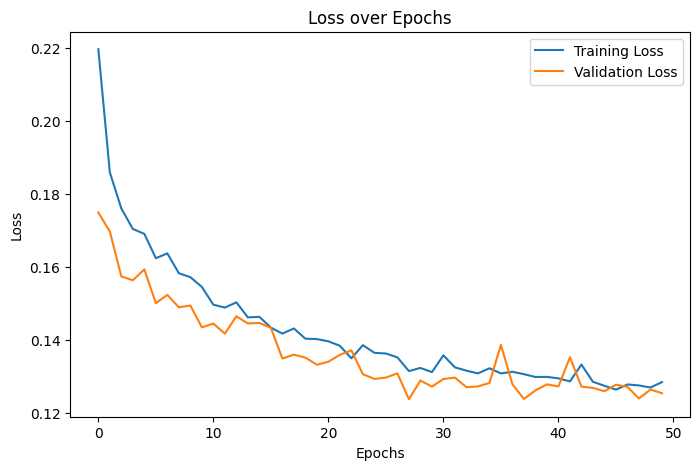

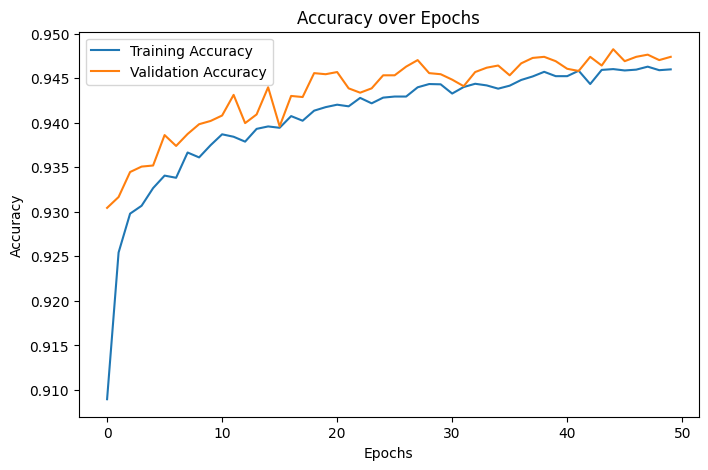

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#using GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional

# Define the improved GRU model
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, return_sequences=True, activation="relu")),
    BatchNormalization(),

    Bidirectional(GRU(16, activation="relu")),
    BatchNormalization(),

    Dense(32, activation="relu"),

    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model with optimized parameters
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional

# Define the improved GRU model
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(16, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model with optimized parameters
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=35,  # Increased epochs for better learning
    batch_size=32,  # Reduced batch size for better generalization
    validation_split=0.2,  # Keeps 20% of training data for validation
    shuffle=True,  # Ensures better randomness in training
    verbose=1,
)

Epoch 1/35
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.8985 - loss: 0.2433 - val_accuracy: 0.9302 - val_loss: 0.1764
Epoch 2/35
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9282 - loss: 0.1801 - val_accuracy: 0.9336 - val_loss: 0.1622
Epoch 3/35
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9281 - loss: 0.1735 - val_accuracy: 0.9354 - val_loss: 0.1567
Epoch 4/35
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9327 - loss: 0.1657 - val_accuracy: 0.9376 - val_loss: 0.1531
Epoch 5/35
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9336 - loss: 0.1622 - val_accuracy: 0.9369 - val_loss: 0.1549
Epoch 6/35
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9342 - loss: 0.1581 - val_accuracy: 0.9378 - val_loss: 0.1451
Epoch 7/35
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9378 - loss: 0.1504 - val_accuracy: 0.9414 - val_loss: 0.1400
Epoch 8/35
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9390 - loss

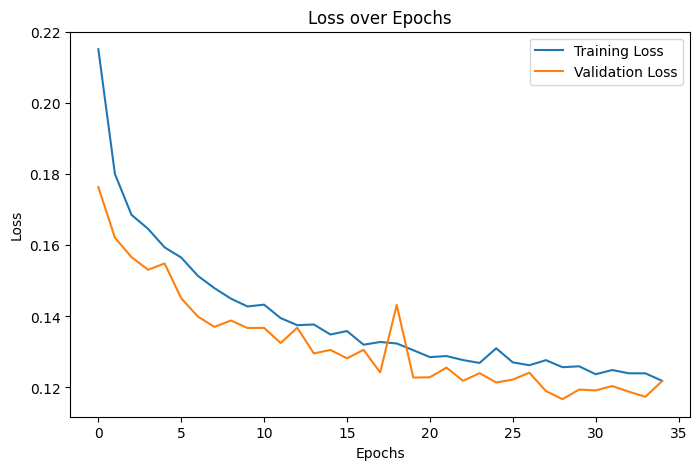

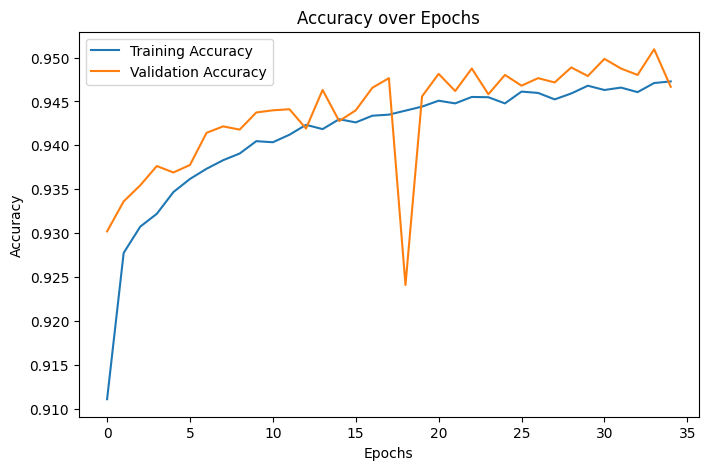

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
print(X_train.shape)

(40972, 10, 5)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, BatchNormalization, LayerNormalization, MultiHeadAttention,
    GlobalAveragePooling1D, Add
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    """ Transformer Encoder Block with Pre-Norm and GeLU activation """

    # Pre-Norm: Layer Normalization before Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    x = Add()([inputs, x])  # Residual Connection

    # Pre-Norm: Layer Normalization before Feed-Forward Network
    x_ffn = LayerNormalization(epsilon=1e-6)(x)
    x_ffn = Dense(ff_dim, activation="gelu")(x_ffn)  # GeLU instead of ReLU
    x_ffn = Dropout(dropout)(x_ffn)
    x_ffn = Dense(head_size)(x_ffn)  # Ensure shape consistency

    # Add Residual Connection
    x = Add()([x, x_ffn])

    return x

# Input Shape (Matches X_train.shape = (40972, 10, 5))
input_shape = (10, 5)
inputs = Input(shape=input_shape)

# Initial Dense Projection to match transformer expected dimensions (5 → 128)
x = Dense(128, activation="gelu")(inputs)

# Stacking More Transformer Blocks for Better Feature Learning
x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256)
x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256)
x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256)
x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256)

# Global Pooling & Fully Connected Layers
x = GlobalAveragePooling1D()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  # Increased dropout for regularization

x = Dense(64, activation="gelu")(x)  # Larger dense layer
x = Dropout(0.4)(x)  # Increased dropout

outputs = Dense(1, activation="sigmoid")(x)  # Binary Classification Output

# Create Model
model = Model(inputs, outputs)

# Compile the model with a Lower Learning Rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print Model Summary
model.summary()

# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
]

# Train the model with more epochs
history = model.fit(
    X_train, y_train,
    epochs=50,  # More epochs for better learning
    batch_size=32,  # Small batch size to generalize better
    validation_split=0.2,
    shuffle=True,
    verbose=1,
    callbacks=callbacks
)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 10, 5)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_42 (Dense)          │ (None, 10, 128)        │            768 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_27    │ (None, 10, 128)        │            256 │ dense_42[0][0]         │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 10, 128)        │        527,488 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_44 (Dropout)      │ (None, 10, 128)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_15 (Add)              │ (None, 10, 128)        │              0 │ dense_42[0][0],        │
│                           │                        │                │ dropout_44[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_28    │ (None, 10, 128)        │            256 │ add_15[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_43 (Dense)          │ (None, 10, 256)        │         33,024 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_45 (Dropout)      │ (None, 10, 256)        │              0 │ dense_43[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_44 (Dense)          │ (None, 10, 128)        │         32,896 │ dropout_45[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 10, 128)        │              0 │ add_15[0][0],          │
│                           │                        │                │ dense_44[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_29    │ (None, 10, 128)        │            256 │ add_16[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_10   │ (None, 10, 128)        │        527,488 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_47 (Dropout)      │ (None, 10, 128)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_17 (Add)              │ (None, 10, 128)        │              0 │ add_16[0][0],          │
│                           │                        │                │ dropout_47[0][0]       │
├──────────────────────

 Total params: 2,385,281 (9.10 MB)

 Trainable params: 2,385,025 (9.10 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 94s 32ms/step - accuracy: 0.8980 - loss: 0.2437 - val_accuracy: 0.9247 - val_loss: 0.1892 - learning_rate: 1.0000e-04
Epoch 2/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 53s 16ms/step - accuracy: 0.9164 - loss: 0.1980 - val_accuracy: 0.9267 - val_loss: 0.1781 - learning_rate: 1.0000e-04
Epoch 3/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9243 - loss: 0.1859 - val_accuracy: 0.9308 - val_loss: 0.1830 - learning_rate: 1.0000e-04
Epoch 4/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9273 - loss: 0.1768 - val_accuracy: 0.9324 - val_loss: 0.1701 - learning_rate: 1.0000e-04
Epoch 5/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9284 - loss: 0.1744 - val_accuracy: 0.9340 - val_loss: 0.1612 - learning_rate: 1.0000e-04
Epoch 6/50
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9307 - loss: 0.1694 - val_accuracy: 0.9346 - val_loss: 0.1564 - learning_rate: 1.0000e-04
Epoch 7/50
1025/1025 ━━━━━━━━━━━━━━━━━━━

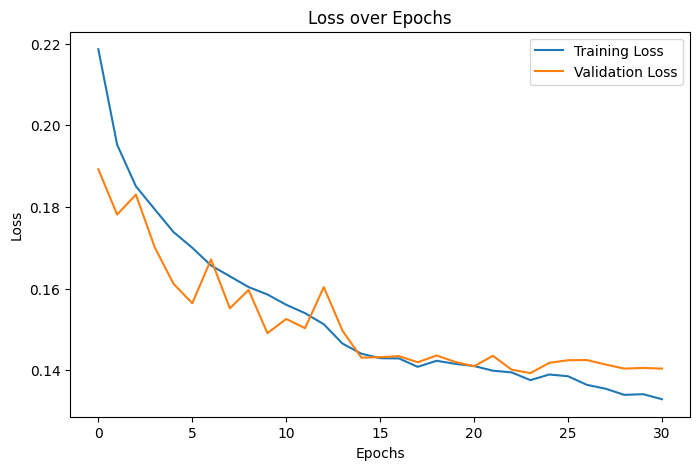

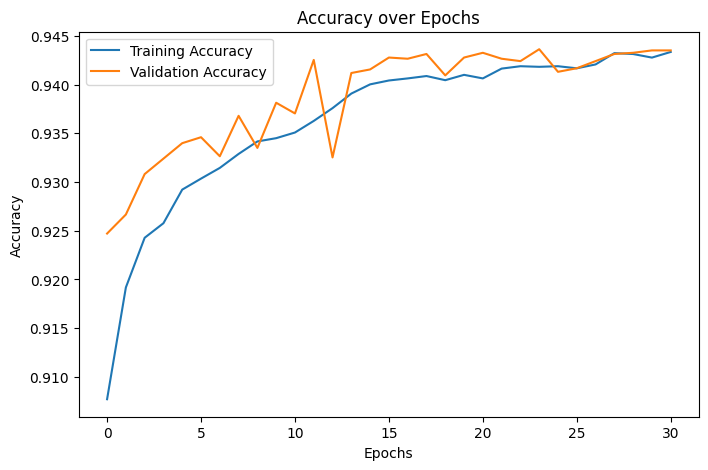

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save("avc_log_classifier2.h5")


In [ ]:
# Predict on the test set
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Print a few predictions
print("Predictions (probabilities):", predictions[:5].flatten())
print("Predicted Labels:", predicted_labels[:5].flatten())
print("Actual Labels:", y_test[:5])


321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Predictions (probabilities): [2.0068141e-07 6.3704726e-07 6.6335298e-07 1.0000000e+00 6.7025453e-01]
Predicted Labels: [0 0 0 1 1]
Actual Labels: [0 0 0 1 0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the entire test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      5049
           1       0.92      0.97      0.94      5195

    accuracy                           0.94     10244
   macro avg       0.94      0.94      0.94     10244
weighted avg       0.94      0.94      0.94     10244

Confusion Matrix:
 [[4617  432]
 [ 166 5029]]


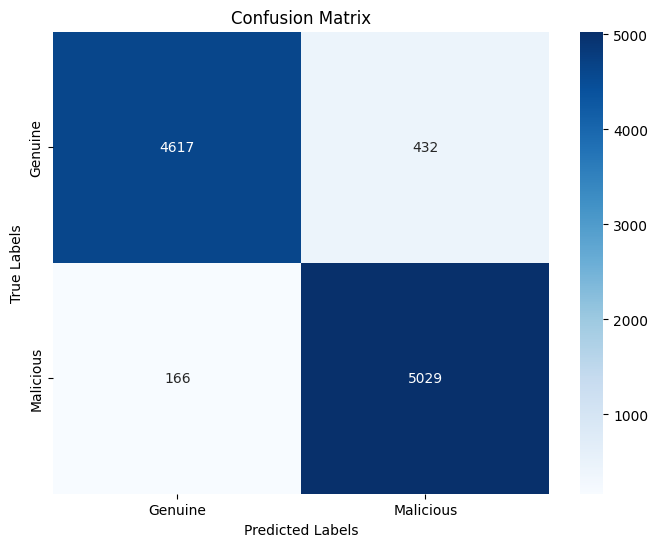

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Malicious'], yticklabels=['Genuine', 'Malicious'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


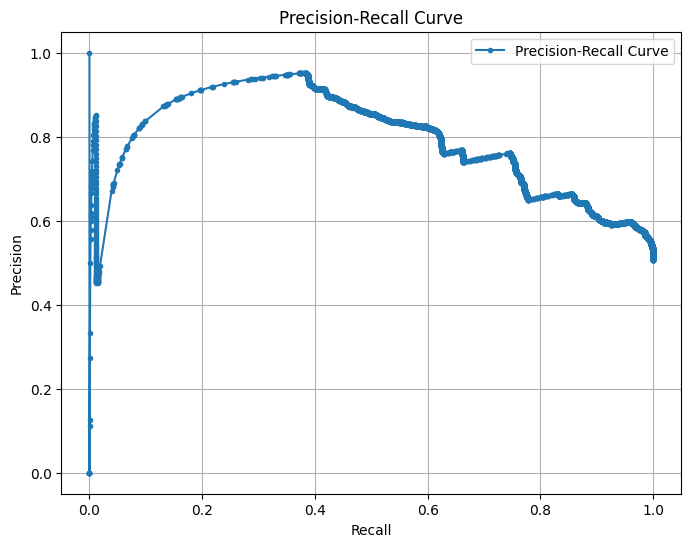

In [ ]:
from sklearn.metrics import precision_recall_curve

# Generate Precision-Recall curve values
y_scores = model.predict(X_test).flatten()
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


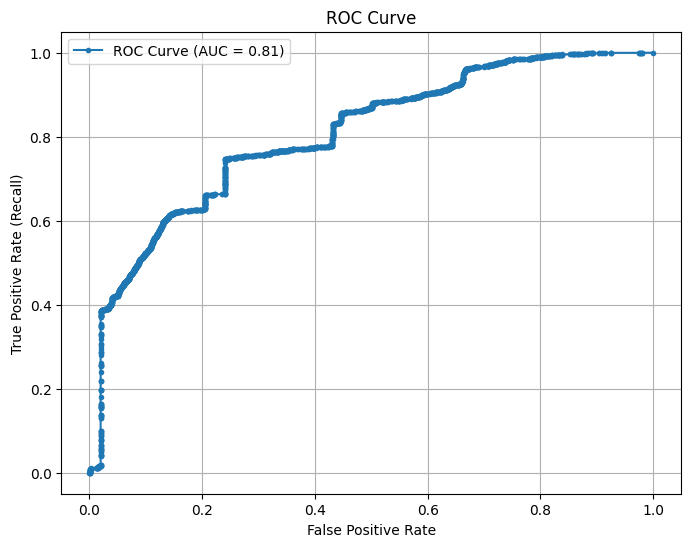

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid()
plt.show()
